In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Load datasets (Assume they are CSV files)
linearX = pd.read_csv("linearX.csv")  # One column dataset
linearY = pd.read_csv("linearY.csv")  # One column dataset

In [3]:
# Concatenating the two datasets along columns (axis=1)
df = pd.concat([linearX, linearY], axis=1)

# Rename columns if needed
df.columns = ['X', 'Y']

# Save the merged dataset (optional)
df.to_csv("merged_dataset.csv", index=False)

In [4]:
df.head()

,X,Y
0,8.0,0.99007
1,9.1,0.99769
2,8.4,0.99386
3,6.9,0.99508
4,7.7,0.99630


In [5]:
# Normalize Data
X = (df['X'] - df['X'].mean()) / df['X'].std()
y = (df['Y'] - df['Y'].mean()) / df['Y'].std()

In [6]:
# Initialize parameters
m = 0  # slope
b = 0  # intercept
lr = 0.5  # learning rate
iterations = 50  # number of iterations
m_values, b_values, cost_values = [], [], []

In [7]:
# Gradient Descent Implementation
def compute_cost(X, y, m, b):
    n = len(y)
    predictions = m * X + b
    cost = (1 / (2 * n)) * np.sum((predictions - y) ** 2)
    return cost

In [8]:
def gradient_descent(X, y, m, b, lr, iterations):
    n = len(y)
    for i in range(iterations):
        predictions = m * X + b
        dm = (-1 / n) * np.sum(X * (y - predictions))
        db = (-1 / n) * np.sum(y - predictions)
        m -= lr * dm
        b -= lr * db
        cost = compute_cost(X, y, m, b)
        m_values.append(m)
        b_values.append(b)
        cost_values.append(cost)
        print(f"Iteration {i+1}: Cost={cost:.4f}, m={m:.4f}, b={b:.4f}")
    return m, b

In [9]:
# Run Gradient Descent
m, b = gradient_descent(X, y, m, b, lr, iterations)

Iteration 1: Cost=0.3334, m=0.3276, b=-0.0000
Iteration 2: Cost=0.2922, m=0.4931, b=-0.0000
Iteration 3: Cost=0.2817, m=0.5767, b=-0.0000
Iteration 4: Cost=0.2790, m=0.6189, b=-0.0000
Iteration 5: Cost=0.2783, m=0.6402, b=-0.0000
Iteration 6: Cost=0.2781, m=0.6510, b=-0.0000
Iteration 7: Cost=0.2781, m=0.6564, b=-0.0000
Iteration 8: Cost=0.2781, m=0.6592, b=-0.0000
Iteration 9: Cost=0.2781, m=0.6605, b=-0.0000
Iteration 10: Cost=0.2781, m=0.6612, b=-0.0000
Iteration 11: Cost=0.2781, m=0.6616, b=-0.0000
Iteration 12: Cost=0.2781, m=0.6618, b=-0.0000
Iteration 13: Cost=0.2781, m=0.6619, b=-0.0000
Iteration 14: Cost=0.2781, m=0.6619, b=-0.0000
Iteration 15: Cost=0.2781, m=0.6619, b=-0.0000
Iteration 16: Cost=0.2781, m=0.6619, b=-0.0000
Iteration 17: Cost=0.2781, m=0.6619, b=-0.0000
Iteration 18: Cost=0.2781, m=0.6620, b=-0.0000
Iteration 19: Cost=0.2781, m=0.6620, b=-0.0000
Iteration 20: Cost=0.2781, m=0.6620, b=-0.0000
Iteration 21: Cost=0.2781, m=0.6620, b=-0.0000
Iteration 22: Cost=0.2

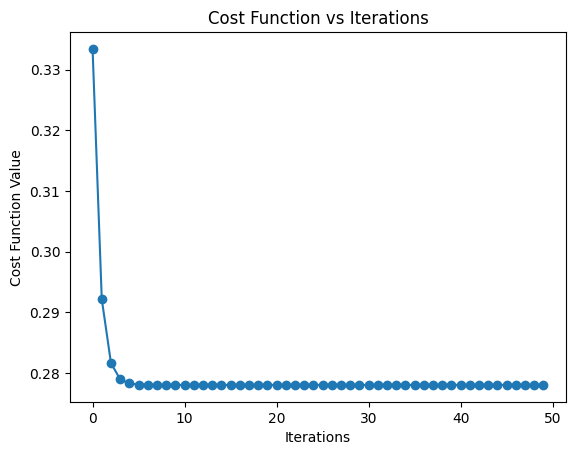

In [10]:
# Plot Cost vs Iterations
plt.plot(range(iterations), cost_values, marker='o')
plt.xlabel("Iterations")
plt.ylabel("Cost Function Value")
plt.title("Cost Function vs Iterations")
plt.savefig("cost_vs_iterations.png")
plt.show()

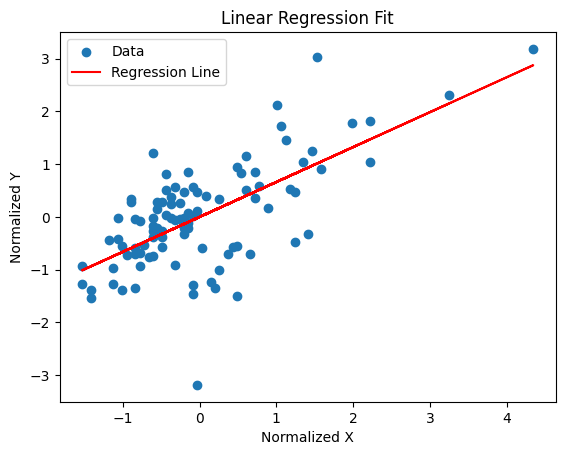

In [11]:
# Plot Data and Regression Line
plt.scatter(X, y, label="Data")
plt.plot(X, m * X + b, color='red', label="Regression Line")
plt.xlabel("Normalized X")
plt.ylabel("Normalized Y")
plt.legend()
plt.title("Linear Regression Fit")
plt.savefig("Linear Regression Fit.png")
plt.show()

Iteration 1: Cost=0.4928, m=0.0033, b=-0.0000
Iteration 2: Cost=0.4907, m=0.0065, b=-0.0000
Iteration 3: Cost=0.4886, m=0.0098, b=-0.0000
Iteration 4: Cost=0.4865, m=0.0130, b=-0.0000
Iteration 5: Cost=0.4845, m=0.0162, b=-0.0000
Iteration 6: Cost=0.4824, m=0.0194, b=-0.0000
Iteration 7: Cost=0.4804, m=0.0226, b=-0.0000
Iteration 8: Cost=0.4784, m=0.0258, b=-0.0000
Iteration 9: Cost=0.4764, m=0.0289, b=-0.0000
Iteration 10: Cost=0.4745, m=0.0320, b=-0.0000
Iteration 11: Cost=0.4725, m=0.0352, b=-0.0000
Iteration 12: Cost=0.4706, m=0.0383, b=-0.0000
Iteration 13: Cost=0.4687, m=0.0414, b=-0.0000
Iteration 14: Cost=0.4668, m=0.0444, b=-0.0000
Iteration 15: Cost=0.4650, m=0.0475, b=-0.0000
Iteration 16: Cost=0.4631, m=0.0505, b=-0.0000
Iteration 17: Cost=0.4613, m=0.0535, b=-0.0000
Iteration 18: Cost=0.4595, m=0.0566, b=-0.0000
Iteration 19: Cost=0.4577, m=0.0596, b=-0.0000
Iteration 20: Cost=0.4559, m=0.0625, b=-0.0000
Iteration 21: Cost=0.4542, m=0.0655, b=-0.0000
Iteration 22: Cost=0.4

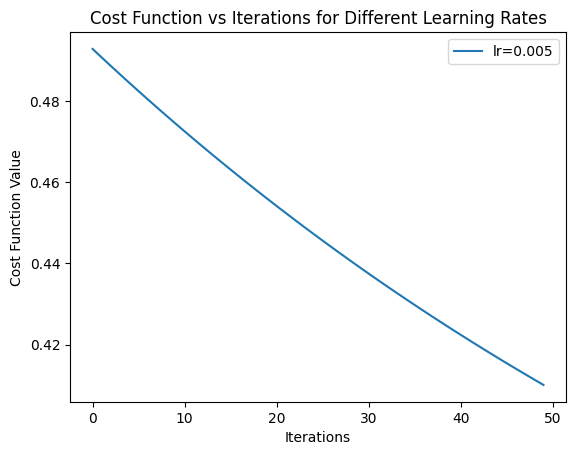

In [22]:
# Test Different Learning Rates
learning_rates = [0.005]
for lr in learning_rates:
    m, b = 0, 0
    cost_values = []
    m, b = gradient_descent(X, y, m, b, lr, iterations)
    plt.plot(range(iterations), cost_values, label=f"lr={lr}")

plt.xlabel("Iterations")
plt.ylabel("Cost Function Value")
plt.title("Cost Function vs Iterations for Different Learning Rates")
plt.legend()
plt.savefig("photo1.png")
plt.show()

Iteration 1: Cost=0.3334, m=0.3276, b=-0.0000
Iteration 2: Cost=0.2922, m=0.4931, b=-0.0000
Iteration 3: Cost=0.2817, m=0.5767, b=-0.0000
Iteration 4: Cost=0.2790, m=0.6189, b=-0.0000
Iteration 5: Cost=0.2783, m=0.6402, b=-0.0000
Iteration 6: Cost=0.2781, m=0.6510, b=-0.0000
Iteration 7: Cost=0.2781, m=0.6564, b=-0.0000
Iteration 8: Cost=0.2781, m=0.6592, b=-0.0000
Iteration 9: Cost=0.2781, m=0.6605, b=-0.0000
Iteration 10: Cost=0.2781, m=0.6612, b=-0.0000
Iteration 11: Cost=0.2781, m=0.6616, b=-0.0000
Iteration 12: Cost=0.2781, m=0.6618, b=-0.0000
Iteration 13: Cost=0.2781, m=0.6619, b=-0.0000
Iteration 14: Cost=0.2781, m=0.6619, b=-0.0000
Iteration 15: Cost=0.2781, m=0.6619, b=-0.0000
Iteration 16: Cost=0.2781, m=0.6619, b=-0.0000
Iteration 17: Cost=0.2781, m=0.6619, b=-0.0000
Iteration 18: Cost=0.2781, m=0.6620, b=-0.0000
Iteration 19: Cost=0.2781, m=0.6620, b=-0.0000
Iteration 20: Cost=0.2781, m=0.6620, b=-0.0000
Iteration 21: Cost=0.2781, m=0.6620, b=-0.0000
Iteration 22: Cost=0.2

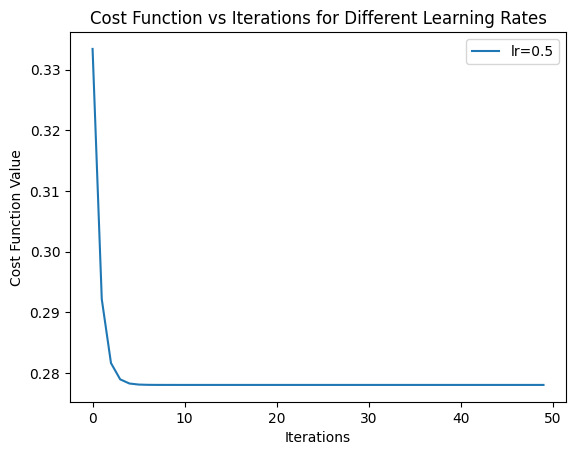

In [23]:
# Test Different Learning Rates
learning_rates = [0.5]
for lr in learning_rates:
    m, b = 0, 0
    cost_values = []
    m, b = gradient_descent(X, y, m, b, lr, iterations)
    plt.plot(range(iterations), cost_values, label=f"lr={lr}")

plt.xlabel("Iterations")
plt.ylabel("Cost Function Value")
plt.title("Cost Function vs Iterations for Different Learning Rates")
plt.legend()
plt.savefig("photo2.png")
plt.show()

Iteration 1: Cost=3.6611, m=3.2763, b=-0.0000
Iteration 2: Cost=53.0478, m=-9.6636, b=0.0000
Iteration 3: Cost=823.4069, m=41.4425, b=-0.0000
Iteration 4: Cost=12839.8617, m=-160.4008, b=0.0000
Iteration 5: Cost=200278.6560, m=636.7784, b=-0.0000
Iteration 6: Cost=3124044.6295, m=-2511.6765, b=0.0000
Iteration 7: Cost=48730438.4472, m=9923.1302, b=-0.0000
Iteration 8: Cost=760122244.7164, m=-39188.0761, b=0.0000
Iteration 9: Cost=11856774702.0403, m=154776.3848, b=0.0000
Iteration 10: Cost=184948022975.4952, m=-611285.2739, b=-0.0000
Iteration 11: Cost=2884913651716.8530, m=2414271.3784, b=0.0000
Iteration 12: Cost=45000355472715.3828, m=-9535149.3393, b=-0.0000
Iteration 13: Cost=701938510868702.2500, m=37659027.4347, b=0.0000
Iteration 14: Cost=10949195131121094.0000, m=-148734135.3798, b=-0.0000
Iteration 15: Cost=170791133643599712.0000, m=587424719.7766, b=0.0000
Iteration 16: Cost=2664087266867371520.0000, m=-2320030960.6896, b=-0.0000
Iteration 17: Cost=41555792821747761152.0000

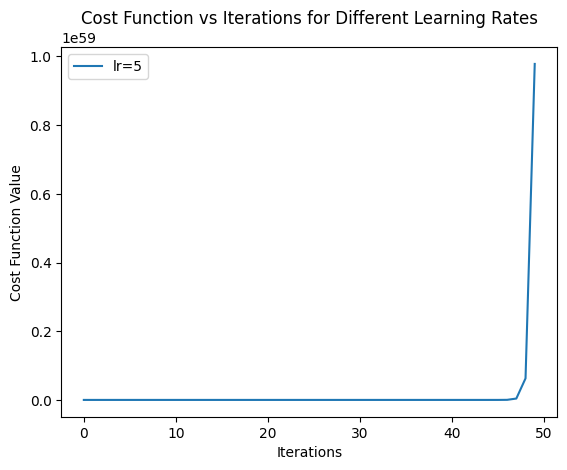

In [24]:
# Test Different Learning Rates
learning_rates = [5]
for lr in learning_rates:
    m, b = 0, 0
    cost_values = []
    m, b = gradient_descent(X, y, m, b, lr, iterations)
    plt.plot(range(iterations), cost_values, label=f"lr={lr}")

plt.xlabel("Iterations")
plt.ylabel("Cost Function Value")
plt.title("Cost Function vs Iterations for Different Learning Rates")
plt.legend()
plt.savefig("photo3.png")
plt.show()

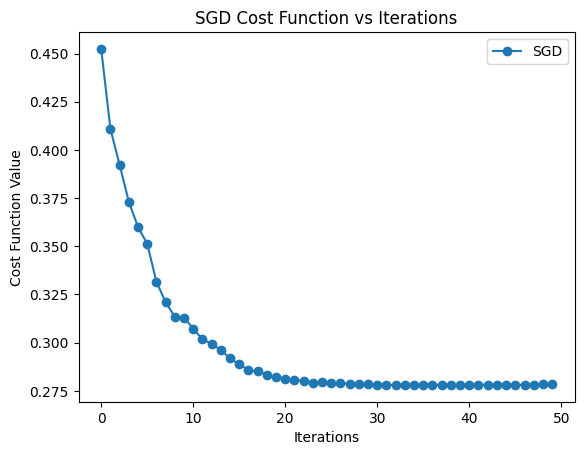

In [32]:
# Implement Stochastic Gradient Descent
def stochastic_gradient_descent(X, y, m, b, lr, iterations):
    n = len(y)
    cost_values = []  # Reset cost_values to avoid mismatched sizes
    for i in range(iterations):
        for j in range(n):
            index = np.random.randint(0, n)
            x_i, y_i = X.iloc[index], y.iloc[index]
            prediction = m * x_i + b
            dm = -x_i * (y_i - prediction)
            db = -(y_i - prediction)
            m -= lr * dm  # Ensure stable updates
            b -= lr * db
        cost = compute_cost(X, y, m, b)
        cost_values.append(cost)  # Append cost at each iteration
    return m, b, cost_values

# Choose a smaller learning rate for SGD
lr_sgd = 0.001  # Reduce learning rate for stability
m, b, cost_values = stochastic_gradient_descent(X, y, 0, 0, lr_sgd, iterations)

# Plot SGD Cost Function vs Iterations
plt.plot(range(iterations), cost_values, label="SGD", marker='o')
plt.xlabel("Iterations")
plt.ylabel("Cost Function Value")
plt.title("SGD Cost Function vs Iterations")
plt.legend()
plt.savefig("SDG.png")
plt.show()

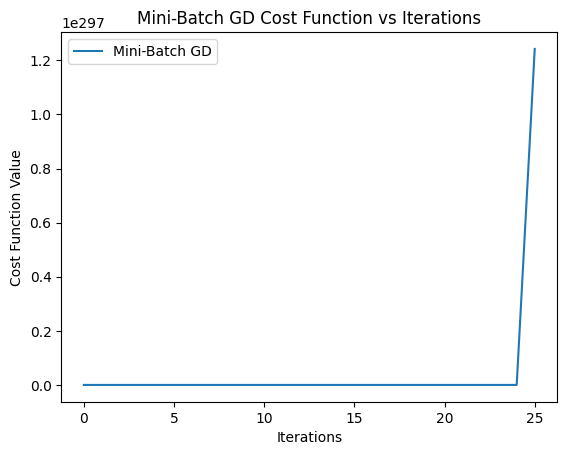

In [33]:
# Implement Mini-Batch Gradient Descent
def mini_batch_gradient_descent(X, y, m, b, lr, iterations, batch_size=10):
    n = len(y)
    cost_values = []
    for i in range(iterations):
        indices = np.random.permutation(n)
        X_shuffled = X.iloc[indices]
        y_shuffled = y.iloc[indices]
        for j in range(0, n, batch_size):
            X_batch = X_shuffled.iloc[j:j+batch_size]
            y_batch = y_shuffled.iloc[j:j+batch_size]
            predictions = m * X_batch + b
            dm = (-1 / batch_size) * np.sum(X_batch * (y_batch - predictions))
            db = (-1 / batch_size) * np.sum(y_batch - predictions)
            m -= lr * dm
            b -= lr * db
        cost = compute_cost(X, y, m, b)
        cost_values.append(cost)
    return m, b, cost_values

m, b, cost_values = mini_batch_gradient_descent(X, y, 0, 0, lr, iterations)
plt.plot(range(iterations), cost_values, label="Mini-Batch GD")
plt.xlabel("Iterations")
plt.ylabel("Cost Function Value")
plt.title("Mini-Batch GD Cost Function vs Iterations")
plt.legend()
plt.savefig("Mini-Batch GD.png")
plt.show()